In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
os.getcwd()

'C:\\Users\\miles\\Projects\\thesis_notebooks\\2023.09.20 - Datasets'

In [6]:
df = pd.read_hdf(r'C:/Users/miles/Projects/datasets/heidelberg/shd_test.h5')

ValueError: Dataset(s) incompatible with Pandas data types, not table, or no datasets found in HDF5 file.

In [1]:
import h5py
f = h5py.File(r'C:/Users/miles/Projects/datasets/heidelberg/shd_test.h5')

In [3]:
f.keys()

<KeysViewHDF5 ['extra', 'labels', 'spikes']>

In [24]:
x,y = np.array(f['labels']), np.array(f['spikes']['times'])

In [26]:
x.shape,y.shape

((2264,), (2264,))

(9386,)

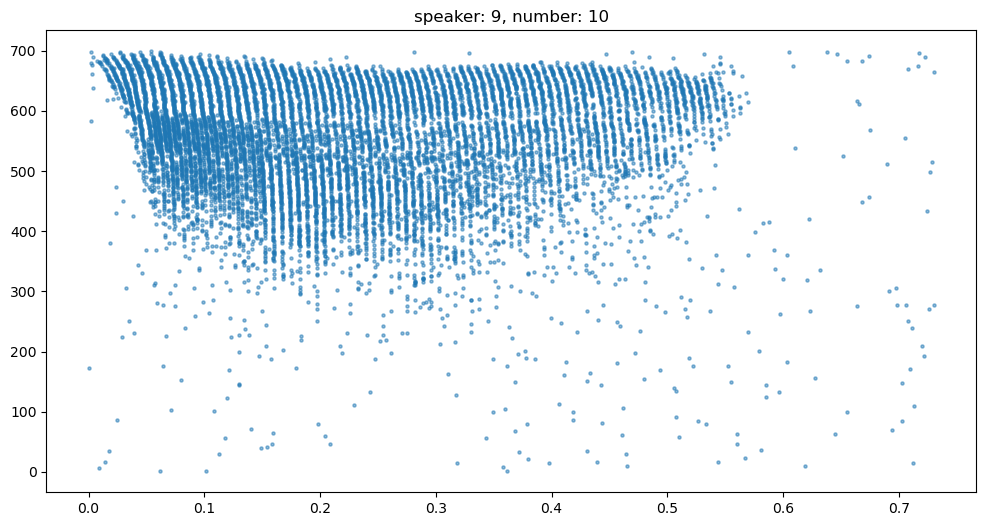

In [411]:
plt.figure(figsize=(12,6))
i=0
speaker = f['extra']['speaker'][i]
number = f['labels'][i]
plt.title(f'speaker: {speaker}, number: {number}')
times = f['spikes']['times'][i]
units = f['spikes']['units'][i]
plt.scatter(times,units,s=5,alpha=0.5)
plt.show()

In [413]:
times[500:515], (times[500:15]*1000).astype('int'), units[500:515]

(array([0.0488 , 0.04883, 0.0489 , 0.0489 , 0.0489 , 0.04892, 0.04892,
        0.04892, 0.04895, 0.04895, 0.049  , 0.04904, 0.04904, 0.04913,
        0.04913], dtype=float16),
 array([], dtype=int32),
 array([685, 605, 601, 620, 680, 607, 613, 628, 604, 677, 606, 500, 609,
        622, 629], dtype=uint16))

In [427]:
times[units==612]

array([0.03665, 0.04245, 0.0487 , 0.0568 , 0.0649 , 0.0734 , 0.082  ,
       0.0891 , 0.09735, 0.10535, 0.1142 , 0.1295 , 0.136  , 0.1449 ,
       0.1516 , 0.1598 , 0.1665 , 0.1758 , 0.1818 , 0.1888 , 0.196  ,
       0.2032 , 0.2117 , 0.2245 , 0.2316 , 0.2396 , 0.2455 , 0.2527 ,
       0.267  , 0.2883 , 0.308  , 0.3162 , 0.329  , 0.3367 , 0.3428 ,
       0.3582 , 0.3638 , 0.3713 , 0.3787 , 0.3928 , 0.4001 , 0.4219 ,
       0.4285 , 0.436  , 0.4438 , 0.4575 , 0.4646 , 0.486  , 0.5015 ,
       0.5146 , 0.5283 , 0.542  , 0.5547 ], dtype=float16)

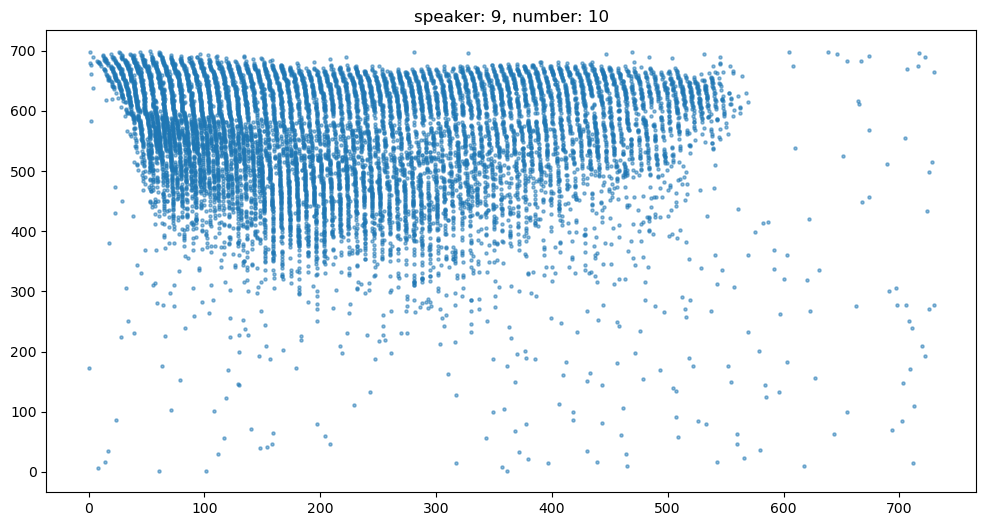

In [409]:
plt.figure(figsize=(12,6))
i=0
speaker = f['extra']['speaker'][i]
number = f['labels'][i]
plt.title(f'speaker: {speaker}, number: {number}')
times = (f['spikes']['times'][i]*1000).astype('int')
units = f['spikes']['units'][i]
plt.scatter(times,units,s=5,alpha=0.5)
plt.show()

In [63]:
times,units = f['spikes']['times'][i], f['spikes']['units'][i]
len(x[y==600])
x[y==600]

array([0.04663, 0.054  , 0.063  , 0.0842 , 0.09106, 0.0986 , 0.1134 ,
       0.1214 , 0.1346 , 0.1427 , 0.1787 , 0.1855 , 0.1935 , 0.2205 ,
       0.2272 , 0.2332 , 0.2404 , 0.2471 , 0.2534 , 0.2668 , 0.2808 ,
       0.287  , 0.2935 , 0.3137 , 0.32   , 0.3264 , 0.332  , 0.3386 ,
       0.345  , 0.3513 ], dtype=float16)

In [73]:
np.max(f['spikes']['times'][i])*1000

784.66796875

In [192]:
len(times)

11273

In [186]:
D = 5/1000
windows = []
for i,t in enumerate(times[units==600]):
    if t - D >= 0:
        windows.append((times[(times>=t-D) & (times<= t+D)] - min(times[(times>=t-D) & (times <=t+D)]), units[(times>=t-D) & (times<= t+D)]))
    else:
        windows.append((times[(times>0) & (times <=t+D)] - min(times[(times>0) & (times <=t+D)]) ,units[(times>0) & (times <=t+D)]))
#     windows[-1] -= np.min(windows[-1][0])
    

In [187]:
for k in windows:
    print(min(k[0]))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


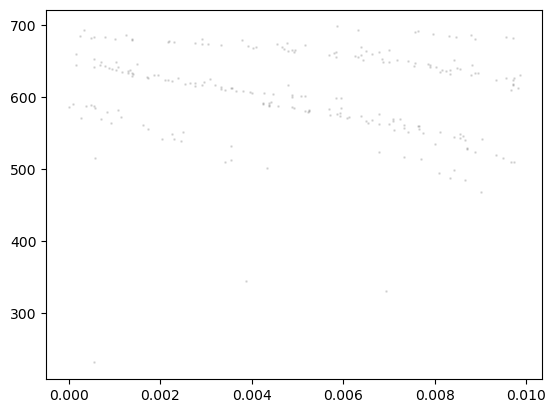

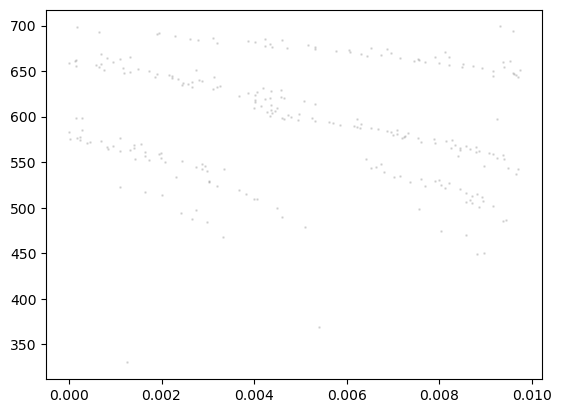

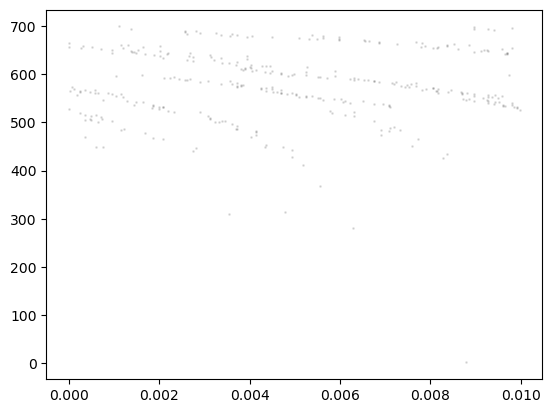

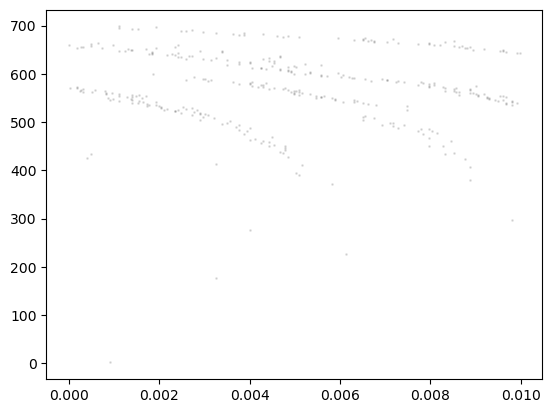

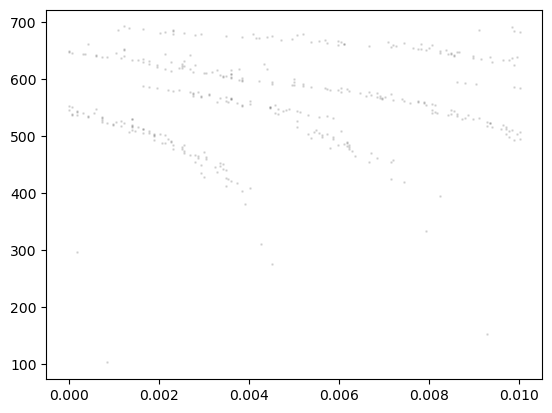

In [190]:
for i in range(len(windows))[:5]:
    plt.figure()
    plt.scatter(windows[i][0],windows[i][1],c='black',alpha=0.1,s=1)  
    plt.show()

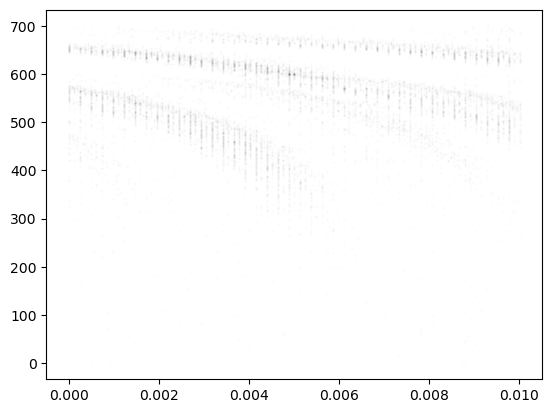

In [191]:
plt.figure()
for i in range(len(windows)):
    plt.scatter(windows[i][0],windows[i][1],c='black',alpha=0.01,s=1)  
plt.show()

In [231]:
import scan
import simulate_data
times

array([0.      , 0.001625, 0.001625, ..., 0.7285  , 0.7305  , 0.7305  ],
      dtype=float16)

In [203]:
len((times*1000).astype('int')), len(units), int(D*1000)

(11273, 11273, 5)

In [204]:
pattern_template, sublist_keys_filt, window_time, cluster_time, sequence_time = scan.scan_raster((times*1000).astype('int'), units,window_dim=int(D*1000))

11273 Windows
392 patterns found..... 100%10.01 | opt_cutoff - 1.09 | most_detections - 7etections - 7


In [211]:
for k in pattern_template:
    print(len(k))

134
62
79
82
2
86
126
156
53
20
10
61
145
156
100
158
78
109
93
26
112
164
87
160
104
67
159
83
102
57
2
67
120
77
102
156
130
98
139
130
14
144
58
76
127
65
184
150
130
195
91
87
108
85
158
5
50
116
70
133
99
20
17
148
132
186
40
82
87
3
58
25
30
85
45
84
138
57
120
93
173
63
28
86
178
25
4
50
28
133
107
37
196
45
88
86
163
53
156
44
102
198
37
131
105
109
100
46
11
66
73
196
106
18
149
63
44
47
39
37
31
34
77
90
130
123
76
21
103
75
77
81
110
31
96
112
112
63
57
47
116
50
94
126
87
54
31
121
40
54
66
154
126
8
71
62
174
90
94
131
176
55
52
104
58
54
82
72
76
108
75
63
29
106
29
123
74
86
88
39
21
73
63
146
48
87
46
71
46
94
78
54
63
41
88
87
83
92
75
51
64
39
7
94
85
156
54
48
60
65
45
41
30
54
113
59
82
64
38
25
84
86
63
10
63
45
29
111
23
74
86
17
73
67
13
133
53
89
31
63
83
142
94
61
51
35
52
18
34
75
49
100
70
60
44
38
79
60
64
33
110
30
34
14
43
44
41
65
75
25
60
49
20
49
8
93
22
60
106
64
31
38
50
16
71
35
93
19
22
42
45
35
46
41
34
17
73
52
21
66
28
32
10
20
40
80
25
47
17
41


In [217]:
pattern_template[0].T[0]

array([ 0,  0,  0,  0,  1,  1,  1,  2,  2,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  6,  6,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11,
       11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16,
       16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18])

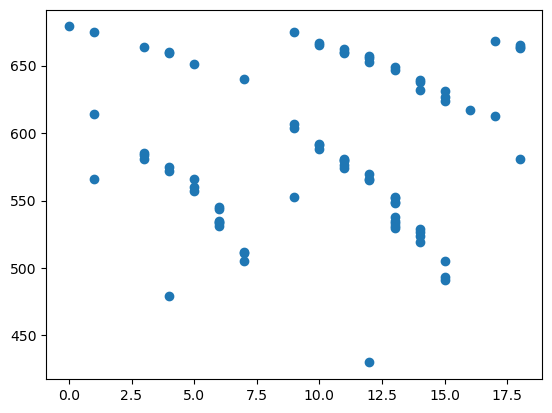

In [221]:
plt.figure()
plt.scatter(*pattern_template[3].T)
plt.show()


In [232]:
def get_imgs(N, pattern_template):
    if len(pattern_template) == 0:
        print('FAIL')
        return pattern_template, None
    
    win_size = (N,1+max([max(k[:,0]) for k in pattern_template]))
    pattern_img = np.zeros((len(pattern_template),*win_size))
    for p,pattern in enumerate(pattern_template):
        for (i,j) in pattern:
            pattern_img[p,j,i] = 1
            
    pattern_img = pattern_img.transpose((1,2,0))
    
    return pattern_template, pattern_img


In [234]:
pattern_template_copy, pattern_img = get_imgs(max(units),pattern_template)

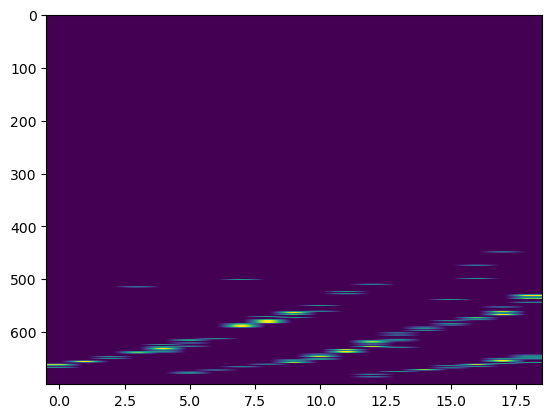

In [238]:
plt.figure()
plt.imshow(pattern_img[...,0],aspect='auto')

In [241]:
pattern_img.shape

(699, 19, 392)

In [274]:
raster = np.zeros((max((times*1000).astype('int'))+1, max(units)))
print(raster.shape)
for i in range(len(times)):
    raster[int(times[i]*1000),units[i]-1]=1
print('done')

(731, 699)
done


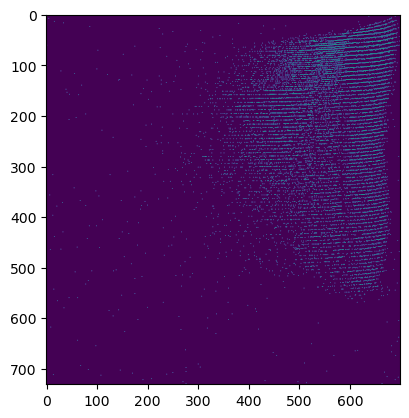

In [275]:
plt.figure()
plt.imshow(raster)

In [277]:
raster.T.shape, pattern_img.shape

((699, 731), (699, 19, 392))

In [290]:
D_ = pattern_img.shape[1]
D_

19

In [297]:
from tqdm import tqdm

In [298]:
sanity_check = np.zeros((731,392))
for j in tqdm(range(392)):
    for i in range(731-D_):
        sanity_check[i,j] = np.sum(pattern_img[...,j]*raster.T[:,i:i+D_])
    sanity_check[:,j] = sanity_check[:,j]/np.max(sanity_check[:,j])

100%|████████████████████████████████████████████████████████████████████████████████| 392/392 [00:16<00:00, 23.19it/s]


In [327]:
[len(k) for k in pattern_template]  

[134,
 62,
 79,
 82,
 2,
 86,
 126,
 156,
 53,
 20,
 10,
 61,
 145,
 156,
 100,
 158,
 78,
 109,
 93,
 26,
 112,
 164,
 87,
 160,
 104,
 67,
 159,
 83,
 102,
 57,
 2,
 67,
 120,
 77,
 102,
 156,
 130,
 98,
 139,
 130,
 14,
 144,
 58,
 76,
 127,
 65,
 184,
 150,
 130,
 195,
 91,
 87,
 108,
 85,
 158,
 5,
 50,
 116,
 70,
 133,
 99,
 20,
 17,
 148,
 132,
 186,
 40,
 82,
 87,
 3,
 58,
 25,
 30,
 85,
 45,
 84,
 138,
 57,
 120,
 93,
 173,
 63,
 28,
 86,
 178,
 25,
 4,
 50,
 28,
 133,
 107,
 37,
 196,
 45,
 88,
 86,
 163,
 53,
 156,
 44,
 102,
 198,
 37,
 131,
 105,
 109,
 100,
 46,
 11,
 66,
 73,
 196,
 106,
 18,
 149,
 63,
 44,
 47,
 39,
 37,
 31,
 34,
 77,
 90,
 130,
 123,
 76,
 21,
 103,
 75,
 77,
 81,
 110,
 31,
 96,
 112,
 112,
 63,
 57,
 47,
 116,
 50,
 94,
 126,
 87,
 54,
 31,
 121,
 40,
 54,
 66,
 154,
 126,
 8,
 71,
 62,
 174,
 90,
 94,
 131,
 176,
 55,
 52,
 104,
 58,
 54,
 82,
 72,
 76,
 108,
 75,
 63,
 29,
 106,
 29,
 123,
 74,
 86,
 88,
 39,
 21,
 73,
 63,
 146,
 48,
 87,
 46,
 

In [326]:
pattern_template[0]

array([[  0, 661],
       [  0, 662],
       [  0, 664],
       [  0, 667],
       [  1, 655],
       [  1, 656],
       [  1, 657],
       [  2, 647],
       [  2, 650],
       [  3, 515],
       [  3, 637],
       [  3, 639],
       [  3, 640],
       [  4, 624],
       [  4, 628],
       [  4, 630],
       [  4, 631],
       [  4, 632],
       [  4, 633],
       [  4, 636],
       [  4, 638],
       [  5, 615],
       [  5, 616],
       [  5, 621],
       [  5, 627],
       [  5, 676],
       [  5, 678],
       [  6, 613],
       [  6, 672],
       [  7, 501],
       [  7, 584],
       [  7, 586],
       [  7, 587],
       [  7, 588],
       [  7, 589],
       [  7, 590],
       [  7, 591],
       [  7, 666],
       [  8, 571],
       [  8, 577],
       [  8, 578],
       [  8, 579],
       [  8, 580],
       [  8, 581],
       [  8, 582],
       [  8, 583],
       [  8, 661],
       [  9, 562],
       [  9, 563],
       [  9, 564],
       [  9, 566],
       [  9, 567],
       [  9,

In [340]:
import seaborn as sns
palette = sns.color_palette("rocket")


6

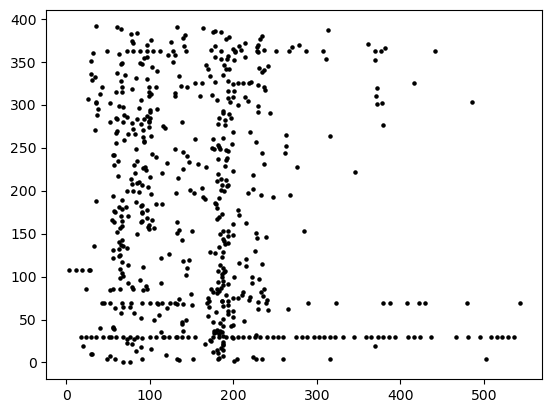

In [341]:
plt.figure()
plt.scatter(*np.where(sanity_check==1),c='black', s=5)
plt.show()

In [366]:
h = np.histogram(np.where(sanity_check==1)[1],bins=len(pattern_template)-1)
h[1][h[0]>10]

TypeError: only integer scalar arrays can be converted to a scalar index

In [391]:
counts = np.array([list(np.where(sanity_check==1)[1]).count(k) for k in np.unique(np.where(sanity_check==1)[1])])
patterns = np.unique(np.where(sanity_check==1)[1])

array([  4,  30,  69, 363], dtype=int64)

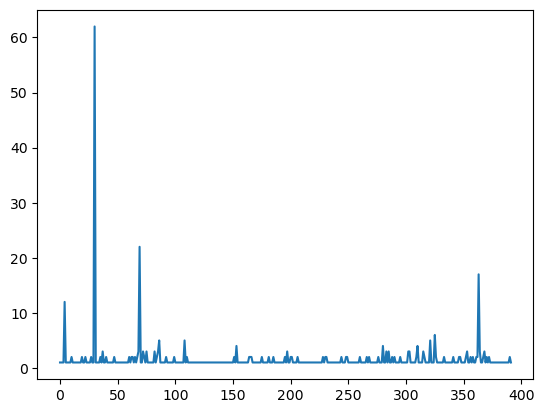

In [390]:
plt.figure()
plt.plot(patterns,counts)
plt.show()

In [402]:
patterns[counts>5]

array([  4,  30,  69, 325, 363], dtype=int64)

In [404]:
counts[counts>5]

array([12, 62, 22,  6, 17])

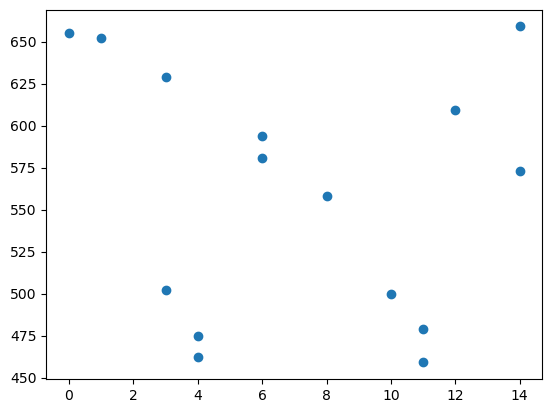

In [403]:
plt.figure()
plt.scatter(*pattern_template[325].T)
plt.show()

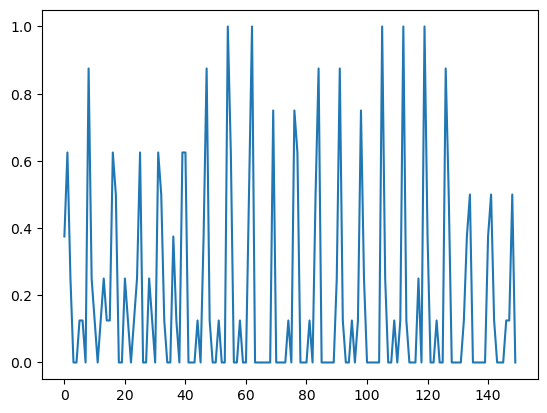

In [407]:
plt.figure()
plt.plot(sanity_check[:,325][100:250])
# plt.scatter(np.where(sanity_check[:,325]==1)[0])
plt.show()

In [92]:
(f['spikes']['times'][i]*1000).astype('int'), (f['spikes']['times'][i])

(array([  0,   1,   1, ..., 728, 730, 730]),
 array([0.      , 0.001625, 0.001625, ..., 0.7285  , 0.7305  , 0.7305  ],
       dtype=float16))

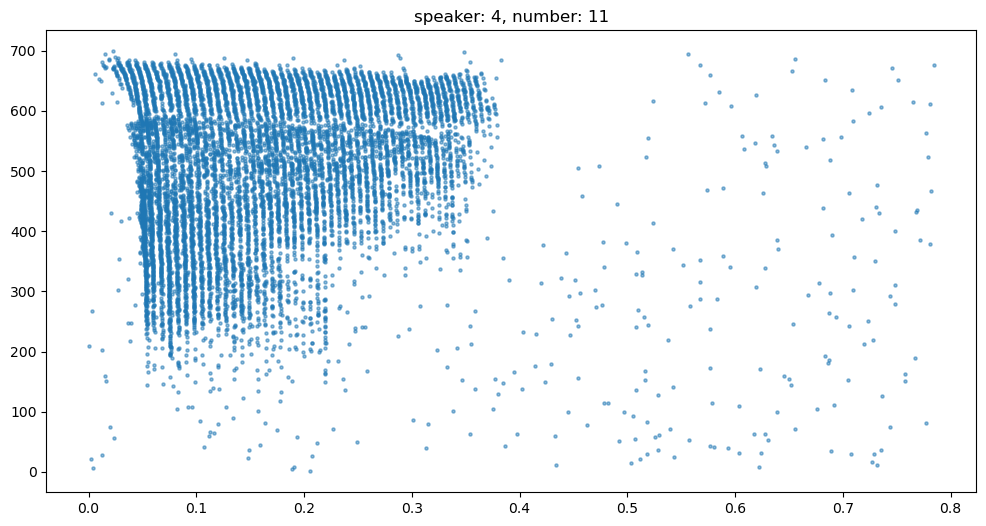

In [83]:
plt.figure(figsize=(12,6))
i=1
speaker = f['extra']['speaker'][i]
number = f['labels'][i]
plt.title(f'speaker: {speaker}, number: {number}')
plt.scatter(f['spikes']['times'][i],f['spikes']['units'][i],s=5,alpha=0.5)
plt.show()